In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trained_data = pd.read_csv("./data/trained_data.csv")

In [3]:
trained_data

,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,4107,9,4,19,55,22,25,2,30,...,False,False,False,True,False,False,False,False,False,False
10678,0,4145,27,4,20,45,23,20,2,35,...,False,False,False,True,False,False,False,False,False,False
10679,0,7229,27,4,8,20,11,20,3,0,...,False,False,False,False,False,False,True,False,False,False
10680,0,12648,1,3,11,30,14,10,2,40,...,False,False,False,False,False,False,False,False,False,True


In [4]:
trained_data.shape

(10682, 30)

In [5]:
trained_data.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_Hour', 'Dep_Min',
       'Arr_Hour', 'Arr_Minute', 'Duration_Hour', 'Duration_Min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [6]:
# Independent Features
X = trained_data.drop(labels=['Price'], axis= 1)

In [7]:
X.head()

,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
# Dependent Feature
y = trained_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

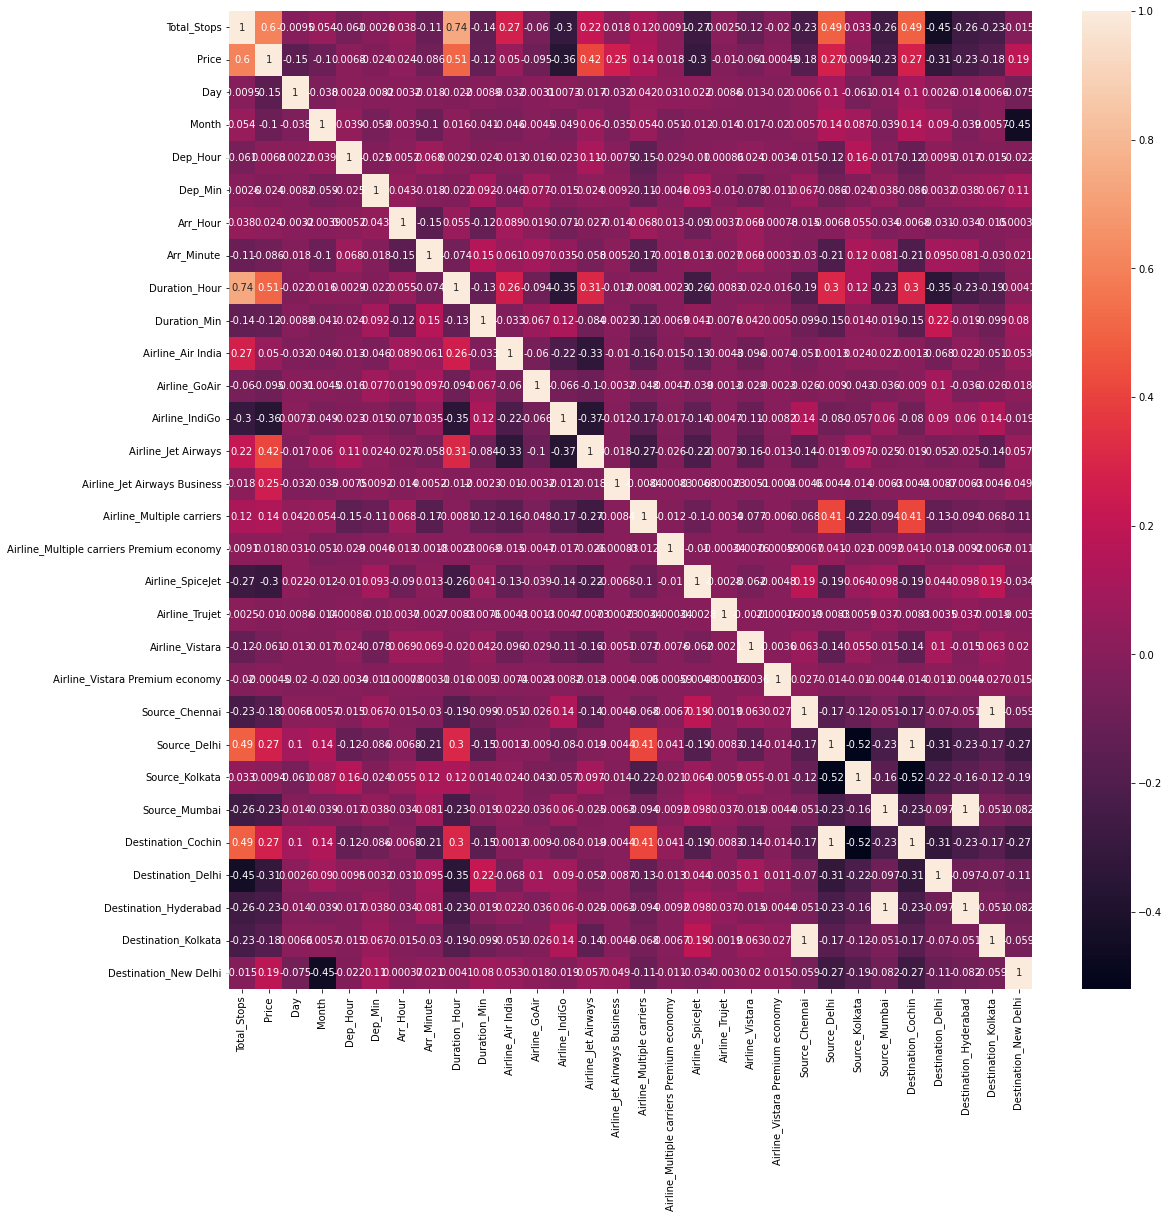

In [9]:
# Correlation between Independent and dependent features

plt.figure(figsize= (18,18))
sns.heatmap(trained_data.corr(), annot= True)
plt.show()

- light  white color depicts high correlation.
- Black color says  negative correlation.
- If two independent feature are highly correlated we can drop one of the independent feature.

In [10]:
# Extracting important features using ExtraTrees Regressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(selection.feature_importances_)

[2.27699132e-01 1.44106721e-01 5.26919897e-02 2.42437873e-02
 2.11014869e-02 2.78093376e-02 1.96664442e-02 1.23049759e-01
 1.78900065e-02 9.88414812e-03 1.76354310e-03 1.58936183e-02
 1.39184194e-01 6.74529442e-02 2.03226352e-02 8.41584251e-04
 2.69518616e-03 9.87094093e-05 5.28491909e-03 8.04330123e-05
 5.15226980e-04 1.12323095e-02 3.14761542e-03 5.93747533e-03
 8.41944139e-03 1.67387276e-02 6.89770215e-03 4.59038090e-04
 2.48918835e-02]


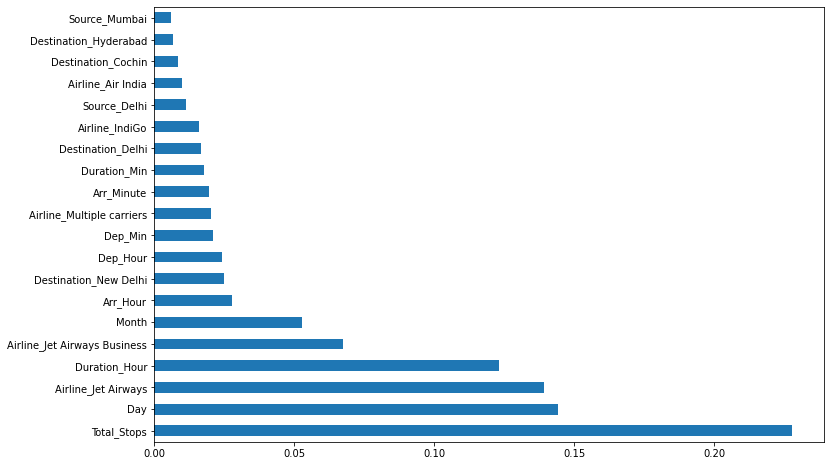

In [12]:
# plot graph of feature importances for better visualization

plt.figure(figsize= (12,8))
feat_importances = pd.Series(selection.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

- Total_Stops is playing the most important features.
- then Airline_Jet Airways, Day, destination_Hour,.., and so on.

In [13]:
## Train test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 30)

In [14]:
print(X.shape, y.shape)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(10682, 29) (10682,)
(7477, 29) (7477,)
(3205, 29) (3205,)


In [15]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train, columns= X.columns)
X_test=pd.DataFrame(X_test, columns= X.columns) 

In [16]:
X_train

,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.333333,0.076923,1.000000,0.695652,0.000000,0.826087,0.000000,0.565217,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.333333,1.000000,0.333333,0.347826,0.636364,0.695652,0.181818,0.130435,0.636364,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.307692,1.000000,0.652174,1.000000,0.913043,0.454545,0.086957,0.545455,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.307692,0.666667,0.260870,0.727273,0.826087,0.272727,0.239130,0.636364,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.333333,0.538462,1.000000,0.608696,1.000000,0.956522,0.545455,0.130435,0.636364,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,0.666667,0.307692,1.000000,0.956522,0.000000,0.826087,0.272727,0.434783,0.272727,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7473,1.000000,0.423077,0.666667,0.521739,0.000000,1.000000,0.272727,0.739130,0.272727,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7474,0.000000,0.307692,1.000000,0.304348,0.181818,0.434783,0.090909,0.021739,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7475,0.333333,0.653846,0.666667,0.869565,0.000000,0.391304,0.363636,0.260870,0.363636,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_test

,Total_Stops,Day,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Minute,Duration_Hour,Duration_Min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.50,0.000000,0.333333,0.521739,0.000000,0.913043,0.909091,0.214286,0.909091,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.884615,0.000000,0.260870,0.545455,1.000000,0.454545,0.380952,1.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.884615,0.333333,0.391304,0.636364,0.521739,0.363636,0.047619,0.818182,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.307692,0.666667,0.826087,0.909091,0.956522,0.909091,0.071429,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.00,0.192308,0.666667,0.434783,0.000000,0.521739,0.818182,0.047619,0.818182,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0.25,0.192308,0.000000,0.956522,0.909091,0.913043,0.363636,0.523810,0.545455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3201,0.50,1.000000,1.000000,0.217391,0.545455,0.826087,0.000000,0.309524,0.545455,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3202,0.25,0.076923,1.000000,0.434783,0.000000,0.826087,0.272727,0.214286,0.272727,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3203,0.50,0.000000,0.666667,1.000000,0.090909,0.826087,0.000000,0.452381,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
## Model Training

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [21]:
## Training multiple models

models = {
    'LinearRegression'        : LinearRegression(),
    'Lasso'                   : Lasso(),
    'Ridge'                   : Ridge(),
    'ElasticNet'              : ElasticNet(),
    'SupportVectorRegression' : SVR(),
    'DecisionTreeRegressor'   : DecisionTreeRegressor()
}

- Created a dictionary(model) and inside that I have created all the objects(LinearRegression, Lasso, Ridge, ElasticNet, SVR and DecisionTree).

In [22]:
trained_model_list = []
model_list = []
r2_list = []

- Created 3 lists : 1st list = training model list
                    2nd list = model list
                    3rd list = r2 list

In [23]:
list(models)

['LinearRegression',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'SupportVectorRegression',
 'DecisionTreeRegressor']

In [24]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'SupportVectorRegression', 'DecisionTreeRegressor'])

In [25]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet(), SVR(), DecisionTreeRegressor()])

In [26]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #this is a validation(test) score
    mae, mse, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MSE:",mse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 2817.489069229233
MSE: 7938244.655226209
MAE: 2013.9157566302652
R2 score 59.42726838103239


Lasso
Model Training Performance
RMSE: 2817.418188854616
MSE: 7937845.250888824
MAE: 2016.3424200204615
R2 score 59.42930975487408


Ridge
Model Training Performance
RMSE: 2803.690641080749
MSE: 7860681.210883782
MAE: 2013.7539513389445
R2 score 59.82369869370563


ElasticNet
Model Training Performance
RMSE: 3663.8539571205456
MSE: 13423825.81910788
MAE: 2865.6368324346795
R2 score 31.390212079207835




SupportVectorRegression
Model Training Performance
RMSE: 4299.566994768784
MSE: 18486276.342505068
MAE: 3373.6766734849657
R2 score 5.515795839734661


DecisionTreeRegressor
Model Training Performance
RMSE: 2988.5587298488776
MSE: 8931483.281755937
MAE: 1925.7514820592824
R2 score 54.350780318743716






- Then running a for loop :
        - getting the data
        - fitting  the data
        - making predicting
        - evaluating model
        - then appending all this in new list



In [30]:

results_df = pd.DataFrame({
    'Model': model_list,
    'R2 Score (%)': [round(score * 100, 2) for score in r2_list]
})

results_df = results_df.sort_values(by='R2 Score (%)', ascending=False)
results_df = results_df.reset_index(drop=True)
# Display the DataFrame
print(results_df)

                     Model  R2 Score (%)
0                    Ridge         59.82
1         LinearRegression         59.43
2                    Lasso         59.43
3    DecisionTreeRegressor         54.35
4               ElasticNet         31.39
5  SupportVectorRegression          5.52
